参考:
https://stackoverflow.com/questions/18703136/proximity-matrix-in-sklearn-ensemble-randomforestclassifier

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import MDS

from matplotlib import pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns
sns.set()

In [2]:
# irisデータセットをロード
data = load_iris()

train_X = data['data']
train_y = data['target']
features = data['feature_names']
target_names = data['target_names']

rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [3]:
def proximityMatrix(model, X, normalize=True):
    """
    近接行列を算出する
    
    Notes:
        https://stackoverflow.com/questions/18703136/proximity-matrix-in-sklearn-ensemble-randomforestclassifier
    """

    terminals = model.apply(X)
    data_size, nTrees = terminals.shape

    proxMat = np.zeros([data_size, data_size])

    for i in range(nTrees):
        belong_node = terminals[:, i]
        proxMat += 1*np.equal.outer(belong_node, belong_node)

    if normalize:
        proxMat = proxMat / nTrees

    return proxMat   

In [4]:
proximity_matrix = proximityMatrix(rfc, train_X, normalize=True)
print(f'proximity_matrix.shape: {proximity_matrix.shape}')

proximity_matrix.shape: (150, 150)


In [5]:
# https://qiita.com/roki18d/items/5927ce2d80006a9e35d5
mds = MDS(n_components=2, random_state=0)
proximity_matrix_mds = mds.fit_transform(proximity_matrix)
print(f'proximity_matrix_mds.shape: {proximity_matrix_mds.shape}')

proximity_matrix_mds.shape: (150, 2)


/usr/local/lib/python3.7/site-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [6]:
# ラベルを追加
tmp = np.concatenate([proximity_matrix_mds, train_y[:, np.newaxis]], axis=1)
# DataFrame化
df_for_plot = pd.DataFrame(tmp, columns=['x1', 'x2', 'label'])
# ラベルを名称に変換
df_for_plot['label'] = df_for_plot['label'].map(lambda x: target_names[int(x)])

Text(0.5, 1.0, 'proximity plot')

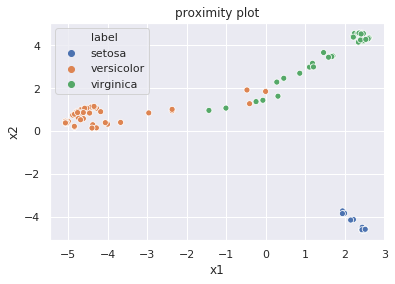

In [7]:
# 近接グラフの可視化
sns.scatterplot(x='x1', y='x2', data=df_for_plot, hue='label')
plt.title('proximity plot')